# HW1

In [1]:
from matplotlib import pyplot as plt

In [2]:
import Blur
import UnBlur
import ImageWrapper
import ImgUtils
import PSNR
import Trajectory

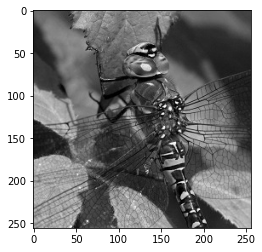

In [3]:
ORIGINAL_IMAGE_PATH  = "./DIPSourceHW1.jpg"
TRAJACTORY_PATH = "./100_motion_paths.mat"
image = ImageWrapper.ImageWrapper(ORIGINAL_IMAGE_PATH )
display(plt.imshow(image.get_image(), cmap='gray'))

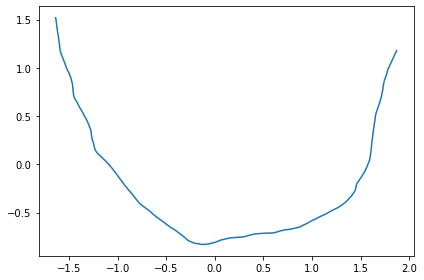

In [4]:
trajactoryController = Trajectory.Trajectories(TRAJACTORY_PATH)
trajactoryController.plot_trajectory(1)

## Plot Trajectories, PSFs and Blurred images

In [5]:
blurController = Blur.Blur(trajactoryController,image)

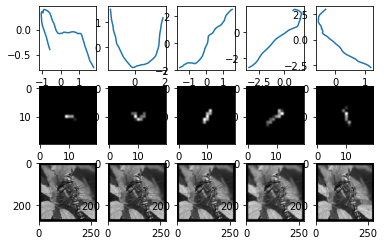

In [6]:
blurController.plot_blured_batch(5)

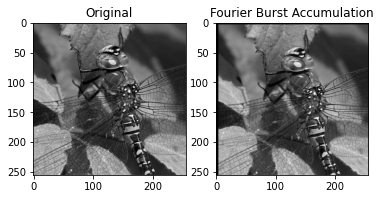

In [7]:
unblurController = UnBlur.Blurr_Fixer(blurController.get_blurred_images(),power=10,ifft_scale=995,
                               original_size=256, margin=6)
fixed = unblurController.unblur_images()
unblurController.show_unblur_image(image)

In [8]:
print_every = 5
num_samples = [i for i in range(100)]

In [9]:
PSNR_results = []
fixed_images = []
for sample in num_samples:
        if sample % print_every == 1:
            print("Deblurring for ",sample," samples...")
        fixed = unblurController.unblur_images()
        fixed_images.append(fixed)
        my_calc = PSNR.PSNR_calculator(image.get_image(), fixed)
        PSNR_results.append(my_calc.evaluate_PSNR())

Deblurring for  1  samples...
Deblurring for  6  samples...
Deblurring for  11  samples...
Deblurring for  16  samples...
Deblurring for  21  samples...
Deblurring for  26  samples...
Deblurring for  31  samples...
Deblurring for  36  samples...
Deblurring for  41  samples...
Deblurring for  46  samples...
Deblurring for  51  samples...
Deblurring for  56  samples...
Deblurring for  61  samples...
Deblurring for  66  samples...
Deblurring for  71  samples...
Deblurring for  76  samples...
Deblurring for  81  samples...
Deblurring for  86  samples...
Deblurring for  91  samples...
Deblurring for  96  samples...


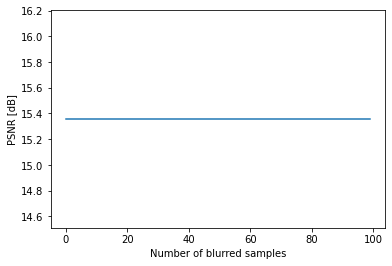

In [10]:
plt.plot(num_samples, PSNR_results)
plt.xlabel("Number of blurred samples")
plt.ylabel("PSNR [dB]")
plt.savefig("./psnr_graph.png")
plt.show()

## save to file PSNR + images

FileNotFoundError: [Errno 2] No such file or directory: './psnr_images/0.png'

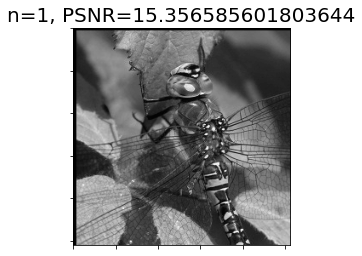

In [11]:
for i in range(len(fixed_images)):
    cropped = fixed_images[i]
    plt.imshow(cropped, cmap='gray')
    plt.title("n={0}, PSNR={1}".format(i+1,PSNR_results[i]), fontsize=20)
    plt.tick_params(labelbottom=False)
    plt.tick_params(labelleft=False)
    plt.savefig( "./psnr_images/" + str(i) + '.png')

In [ ]:
for i in range(len(fixed_images)):
    plt.subplot(10, 10, i+1)
    cropped = fixed_images[i][25:100, 100:175]
    plt.imshow(cropped, cmap='gray')
    k = i+1
    plt.ylabel("n=%i" % k, fontsize=5)
    plt.tick_params(labelbottom=False)
    plt.tick_params(labelleft=False)
plt.show()

### Show first and last iteration for comparison.
 

In [ ]:
plt.subplot(1, 3, 1)
cropped = blurred_images[0]
plt.imshow(cropped, cmap='gray')
plt.title("First Blurred image")
plt.subplot(1, 3, 2)
cropped = fixed_images[0]
plt.imshow(cropped, cmap='gray')
plt.title("First iteration")
plt.subplot(1, 3, 3)
cropped = fixed
plt.imshow(cropped, cmap='gray')
plt.title("100th iteration")
plt.show()